# TensorFlow

In [10]:
import glob                # 用于查询符合特定规则的文件路径名
import os                  # 处理文件和目录
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import cv2                 # 用于图像处理
from PIL import Image
import  tensorflow as tf
import numpy as np                #导入numpy数据库
import matplotlib.pyplot as plt   #导入matplotlib.pyplot模块，主要用于展示图像
from sklearn.model_selection import train_test_split   #从sklearn.model_selection模块导入train_test_split方法,用于拆分数据集

## 数据扩充模块

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

# 数据扩充函数
def date_enhancement(img_input_path, save_path):
    image = load_img(img_input_path, grayscale=False)
    image = img_to_array(image) #图像转为数组
    image = np.expand_dims(image, axis=0) #增加一个维度
    img_dag = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.1,
                            height_shift_range = 0.1, shear_range = 0.2, zoom_range = 0.2,
                            horizontal_flip = True, fill_mode = "nearest") #旋转，宽度移动范围，高度移动范围，裁剪范围，水平翻转开启，填充模式

    img_generator = img_dag.flow(image, batch_size = 1,
                                 save_to_dir = save_path,
                                 save_prefix = "image", save_format = "jpg")#测试一张图像bath_size=1
    count = 0 #计数器
    for img in img_generator:
        count += 1
        if count == 3:  #生成多少个样本后退出
            break

In [3]:
# 调用数据扩充函数，将扩充后的数据存储至源文件路径
def turn_data(folder):
    for im in glob.glob(folder+'/*.jpg'):
        date_enhancement(im, folder)

from PIL import ImageFile        
ImageFile.LOAD_TRUNCATED_IMAGES = True
path = './flower_photos/'
cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]  # 创建层级列表cate，用于对数据存放目录下面的数据文件夹进行遍历，os.path.isdir用于判断文件是否是目录，然后对是目录的文件(os.listdir(path))进行遍历
for idx,folder in enumerate(cate):                                # enumerate函数用于将一个可遍历的数据对象组合为一个索引序列，同时列出数据和下标,一般用在for循环当中
    turn_data(folder)

## 读取数据

In [4]:
path = './flower_photos/'   # 数据集的相对地址，改为你自己的，建议将数据集放入代码文件夹下
# TODO 对图片进行缩放，统一处理为大小为w*h的图像，具体参数需自己定
w = 100      #设置图片宽度为100
h = 100      #设置图片高度为100
c = 3        #设置图片通道为3

In [5]:
flower_dict = {0:'bee_balm',1:'blackberry_lily',2:'blanket_flower',3:'bougainvillea',4:'bromelia',5:'foxglove'}  # 创建图像标签列表
label_dict = {'bee_balm':0,'blackberry_lily':1,'blanket_flower':2,'bougainvillea':3,'bromelia':4,'foxglove':5}
turn_label = [0, 1, 2, 3, 4, 5]       # 在线部署时，因文件夹读取顺序和本地不同，故需将label进行转换

# 根据flower_dict将label转换为该花朵对应的值
def turn_labels(path):                                      # 定义函数read_img，用于读取图像数据，并且对图像进行resize格式统一处理
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]  # 创建层级列表cate，用于对数据存放目录下面的数据文件夹进行遍历，os.path.isdir用于判断文件是否是目录，然后对是目录的文件(os.listdir(path))进行遍历
    for idx,folder in enumerate(cate):                           # enumerate函数用于将一个可遍历的数据对象组合为一个索引序列，同时列出数据和下标,一般用在for循环当中    
        name = folder.replace(path, '')
        turn_label[idx] = label_dict[name]

In [6]:
def read_img(path):                                                    # 定义函数read_img，用于读取图像数据，并且对图像进行resize格式统一处理
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]  # 创建层级列表cate，用于对数据存放目录下面的数据文件夹进行遍历，os.path.isdir用于判断文件是否是目录，然后对是目录的文件(os.listdir(path))进行遍历
    imgs=[]                                                            # 创建保存图像的空列表
    labels=[]                                                          # 创建用于保存图像标签的空列表
    for idx,folder in enumerate(cate):                                # enumerate函数用于将一个可遍历的数据对象组合为一个索引序列，同时列出数据和下标,一般用在for循环当中
        for im in glob.glob(folder+'/*.jpg'):                         # 利用glob.glob函数搜索每个层级文件下面符合特定格式“/*.jpg”的图片，并进行遍历

            # 本地训练时的读取图像方式
            img=cv2.imread(im)                                        # 利用cv2.imread函数读取每一张被遍历的图像并将其赋值给img
            img=cv2.resize(img,(w,h))                                 # 利用cv2.resize函数对每张img图像进行大小缩放，统一处理为大小为w*h的图像

            # 在线测试时的读取图像方式
#             img = Image.open(im)
#             img = np.array(img, dtype=np.float32)
#             img.resize((w, h, 3))
            
            imgs.append(img)                                          # 将每张经过处理的图像数据保存在之前创建的imgs空列表当中
            labels.append(turn_label[idx])                            # 将每张经过处理的图像的标签数据保存在之前创建的labels列表当中
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)   # 利用np.asarray函数对生成的imgs和labels列表数据进行转化，之后转化成数组数据（imgs转成浮点数型，labels转成整数型）

In [7]:
turn_labels(path)
data,label=read_img(path)                                              # 将read_img函数处理之后的数据定义为样本数据data和标签数据label
print("shape of data:",data.shape)                                     # 查看样本数据的大小
print("shape of label:",label.shape)                                   # 查看标签数据的大小

shape of data: (2033, 100, 100, 3)
shape of label: (2033,)


## 模型定义与训练

In [8]:
seed = 109             # 设置随机数种子，即seed值
np.random.seed(seed)   # 保证生成的随机数具有可预测性,即相同的种子（seed值）所产生的随机数是相同的

(x_train, x_val, y_train, y_val) = train_test_split(data, label, test_size=0.20, random_state=seed) #拆分数据集
x_train = x_train / 255  #训练集图片标准化
x_val = x_val / 255      #测试集图片标准化

In [55]:
# Todo 根据设计好的模型结构自行实现模型
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical")
])

model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same', input_shape=(w, h, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [56]:
# Todo 可调整超参数lr，可修改优化器类型
opt = tf.keras.optimizers.Adam(learning_rate=0.001)   #使用Adam优化器，优化模型参数。lr(learning rate, 学习率)

# Todo 可选择其他损失函数
#编译模型以供训练。使用多分类损失函数'sparse_categorical_crossentropy'，使用metrics=['accuracy']即评估模型在训练和测试时的性能的指标，使用的准确率。
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Todo 可调整超参数
#训练模型，决定训练集和验证集，batch size：进行梯度下降训练模型时每个batch包含的样本数。
#verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
# model_name = 'model_ex-{epoch:03d}_acc-{val_accuracy:03f}.h5'
model_name = 'save_model.h5'
trained_model_dir=f'./model/'
os.mkdir(trained_model_dir)
model_path = os.path.join(trained_model_dir, model_name)


checkpoint = tf.keras.callbacks.ModelCheckpoint(
             filepath=model_path,
             monitor='val_accuracy',
             verbose=1,
             save_weights_only=False,
             save_best_only=True,
             mode='max')

patience = 100
earlystop = tf.keras.callbacks.EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=patience)

epochs = 30
hist = model.fit(x_train, y_train, 
          epochs=epochs, 
          shuffle=True,
          callbacks=[earlystop, checkpoint],
          validation_data=(x_val, y_val), 
          batch_size=32, 
          verbose=2)
#输出模型的结构和参数量,如果没有定义好模型或者模型参数有问题，运行会出错
model.summary()

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.51843, saving model to ./model\save_model.h5
51/51 - 8s - loss: 1.4365 - accuracy: 0.4354 - val_loss: 1.2004 - val_accuracy: 0.5184 - 8s/epoch - 160ms/step
Epoch 2/30

Epoch 2: val_accuracy improved from 0.51843 to 0.61179, saving model to ./model\save_model.h5
51/51 - 7s - loss: 1.1574 - accuracy: 0.5492 - val_loss: 1.0103 - val_accuracy: 0.6118 - 7s/epoch - 144ms/step
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.61179
51/51 - 7s - loss: 1.0659 - accuracy: 0.5941 - val_loss: 1.0828 - val_accuracy: 0.5946 - 7s/epoch - 143ms/step
Epoch 4/30

Epoch 4: val_accuracy improved from 0.61179 to 0.67568, saving model to ./model\save_model.h5
51/51 - 7s - loss: 0.9575 - accuracy: 0.6353 - val_loss: 0.8192 - val_accuracy: 0.6757 - 7s/epoch - 144ms/step
Epoch 5/30

Epoch 5: val_accuracy improved from 0.67568 to 0.76167, saving model to ./model\save_model.h5
51/51 - 7s - loss: 0.7930 - accuracy: 0.6943 - val_loss: 0.6525 - val_ac

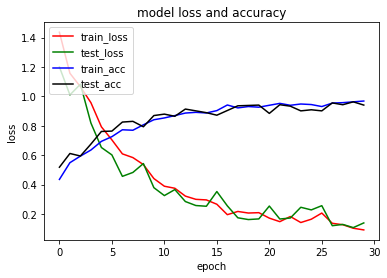

In [58]:
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='g')
plt.plot(hist.history['accuracy'],color='b')
plt.plot(hist.history['val_accuracy'],color='k')
plt.title('model loss and accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left')
plt.show()

## 测试集测试

### 本地训练模型测试

In [59]:
# 读取存储的最佳适配模型
model = tf.keras.models.load_model('./model/save_model.h5')
prediction = np.argmax(model.predict(x_val), axis=1)

correct = [1 if y_val[idx]==pred_label else 0 for idx, pred_label in enumerate(prediction)]
print(sum(correct) / len(correct))

0.9631449631449631


In [60]:
test_path = './TestImages\\' # 测试图像的地址 （改为自己的）

In [61]:
imgs=[]                                                 # 创建保存图像的空列表 
numbers = [0, 0, 0, 0, 0, 0]                                   
for idx, im in enumerate(glob.glob(test_path+'/*.jpg')):               # 利用glob.glob函数搜索每个层级文件下面符合特定格式“/*.jpg”进行遍历
    flower = im.replace(test_path, '')
    flower = flower.replace(".jpg", '')
    flower = flower.replace("/", '')
    numbers[idx] = label_dict[flower]
    print('reading the images:%s'%(flower))                # 遍历图像的同时，打印每张图片的“路径+名称”信息
    
    # 本地训练时的读取图像方式
    img=cv2.imread(im)                                        # 利用cv2.imread函数读取每一张被遍历的图像并将其赋值给img
    img=cv2.resize(img,(w,h))                                 # 利用cv2.resize函数对每张img图像进行大小缩放，统一处理为大小为w*h的图像

    # 在线测试时的读取图像方式
#     img = Image.open(im)
#     img = np.array(img, dtype=np.float32)
#     img.resize((w, h, 3))

    imgs.append(img)                                    # 将每张经过处理的图像数据保存在之前创建的imgs空列表当中

imgs = np.asarray(imgs,np.float32)                      # 利用np.asarray()函数对imgs进行数据转换
print("shape of data:",imgs.shape)

reading the images:bee_balm
reading the images:blackberry_lily
reading the images:blanket_flower
reading the images:bougainvillea
reading the images:bromelia
reading the images:foxglove
shape of data: (6, 100, 100, 3)


In [62]:
prediction = np.argmax(model.predict(imgs), axis=1)

correct = [1 if numbers[idx]==pred_label else 0 for idx, pred_label in enumerate(prediction)]
print("正确率：", sum(correct) / len(correct))
#绘制预测图像
for i in range(np.size(prediction)):
    #打印每张图像的预测结果
    print("第",i+1,"朵花预测:"+flower_dict[prediction[i]])  # flower_dict:定义的标签列表，prediction[i]：预测的结果
#     img = plt.imread(path_test+"test"+str(i+1)+".jpg")      # 使用imread()函数读入对应的图片
#     plt.imshow(img)              #展示图片
#     plt.show()                   #显示图片

正确率： 1.0
第 1 朵花预测:bee_balm
第 2 朵花预测:blackberry_lily
第 3 朵花预测:blanket_flower
第 4 朵花预测:bougainvillea
第 5 朵花预测:bromelia
第 6 朵花预测:foxglove


### 在线训练模型本地测试

In [36]:
online_model = tf.saved_model.load("./")
signature_defs = online_model.signatures.keys()
signature = []
for signature_def in signature_defs:
    signature.append(signature_def)

if len(signature) == 1:
    model_signature = signature[0]
    
predict = online_model.signatures[model_signature]
label_list = ['bee_balm', 'blackberry_lily', 'blanket_flower', 'bougainvillea', 'bromelia', 'foxglove']
result_flower = []
result_label = []

for idx, img in enumerate(imgs):
    img = [img]
    images = tf.convert_to_tensor(img, dtype=tf.dtypes.float32)
    outputs = {}
    logits = predict(images)['dense_1'].numpy()[0].tolist()
    label_index = logits.index(max(logits))
    logits = ['%.4f' % logit for logit in logits]
    outputs['predicted_label'] = label_list[label_index]
    scores = dict(zip(label_list, logits))
    scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)[:5]
    outputs['scores'] = scores
    result_flower.append(outputs['predicted_label'])
    result_label.append(label_dict[outputs['predicted_label']] == numbers[idx])

print("正确率：", sum(result_label) / len(result_label))
for i in range(6):
    print("第", i + 1, "朵花预测:", result_flower[i])

正确率： 1.0
第 1 朵花预测: bee_balm
第 2 朵花预测: blackberry_lily
第 3 朵花预测: blanket_flower
第 4 朵花预测: bougainvillea
第 5 朵花预测: bromelia
第 6 朵花预测: foxglove
